In [54]:
import micro_sam
import tifffile
import os
import numpy as np
from micro_sam.bioimageio import predictor_adaptor as predictor
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from utils import graph_utils as gu
from scipy.ndimage import gaussian_filter
from tqdm.notebook import  tqdm,trange

In [51]:
PROJECT_PATH = 'C:/Users/amityu/DataspellProjects/vesicle/'
DATA_PATH = 'C:/Users/amityu/Ves_Data/'
#DATA_PATH = r'D:\amityu\backoffice_data\\'

movie = '090624'
ADD_PATH = os.path.join(PROJECT_PATH, "add_data/", movie + "/")


MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Vel_Graph/'

In [52]:
img = np.load(MOVIE_PATH + 'np/c0.npy').astype(float)

In [56]:
ds_list = []
for t  in trange(len(img)):
    ds_list.append(ndimage.zoom(gaussian_filter(img[t],2),0.25))
ds_array = np.array(ds_list)
np.save(MOVIE_PATH + 'np/ds_c0.npy', ds_array)

  0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
ds_img = ndimage.zoom(img[0],0.25)

In [28]:
from micro_sam.bioimageio import predictor_adaptor as predictor
from micro_sam.instance_segmentation import AutomaticMaskGenerator
p = predictor.PredictorAdaptor('vit_h')


In [37]:
from micro_sam.instance_segmentation import get_predictor_and_decoder

In [8]:
p = micro_sam.util.get_sam_model('vit_l_em_organelles')

In [18]:
import mobile_sam

In [6]:
from micro_sam.util import precompute_image_embeddings  

In [13]:
img[np.isnan(img)] = 0

In [10]:

result = precompute_image_embeddings(p, ds_img,MOVIE_PATH +'e1/', ndim =3)

Compute Image Embeddings 3D: 100%|██████████| 33/33 [01:28<00:00,  2.69s/it]


In [51]:
import zarr

# Step 1: Open the Zarr group
zgroup = zarr.open_group(MOVIE_PATH, mode='r')

In [48]:
ds_img2 = ndimage.zoo Bm(gaussian_filter(img[0],2),0.125)

In [50]:
np.save(MOVIE_PATH + 'ds_img2_s.npy', ds_img2)

In [20]:
from micro_sam.multi_dimensional_segmentation import segment_mask_in_volume,automatic_3d_segmentation
from micro_sam.instance_segmentation import get_amg
segmentor = get_amg(p,is_tiled=False)
segmented_mask = automatic_3d_segmentation(ds_img2, p, segmentor,MOVIE_PATH +'s2/')

RuntimeError: Embeddings file C:/Users/amityu/Ves_Data/090624/s2/ is invalid due to mismatch in data_signature: e15bffa53c5432f01021c8dbbe64967f00a36181 != f922e5da407ef46b0e7eb285812cd4b18c76eff5. Please recompute embeddings in a new file.

In [42]:
seg_res = segment_mask_in_volume(ds_img,p,result,False, False, 0.95,'mask')

IndexError: index 87 is out of bounds for axis 0 with size 33

IndexError: index 17 is out of bounds for axis 0 with size 17

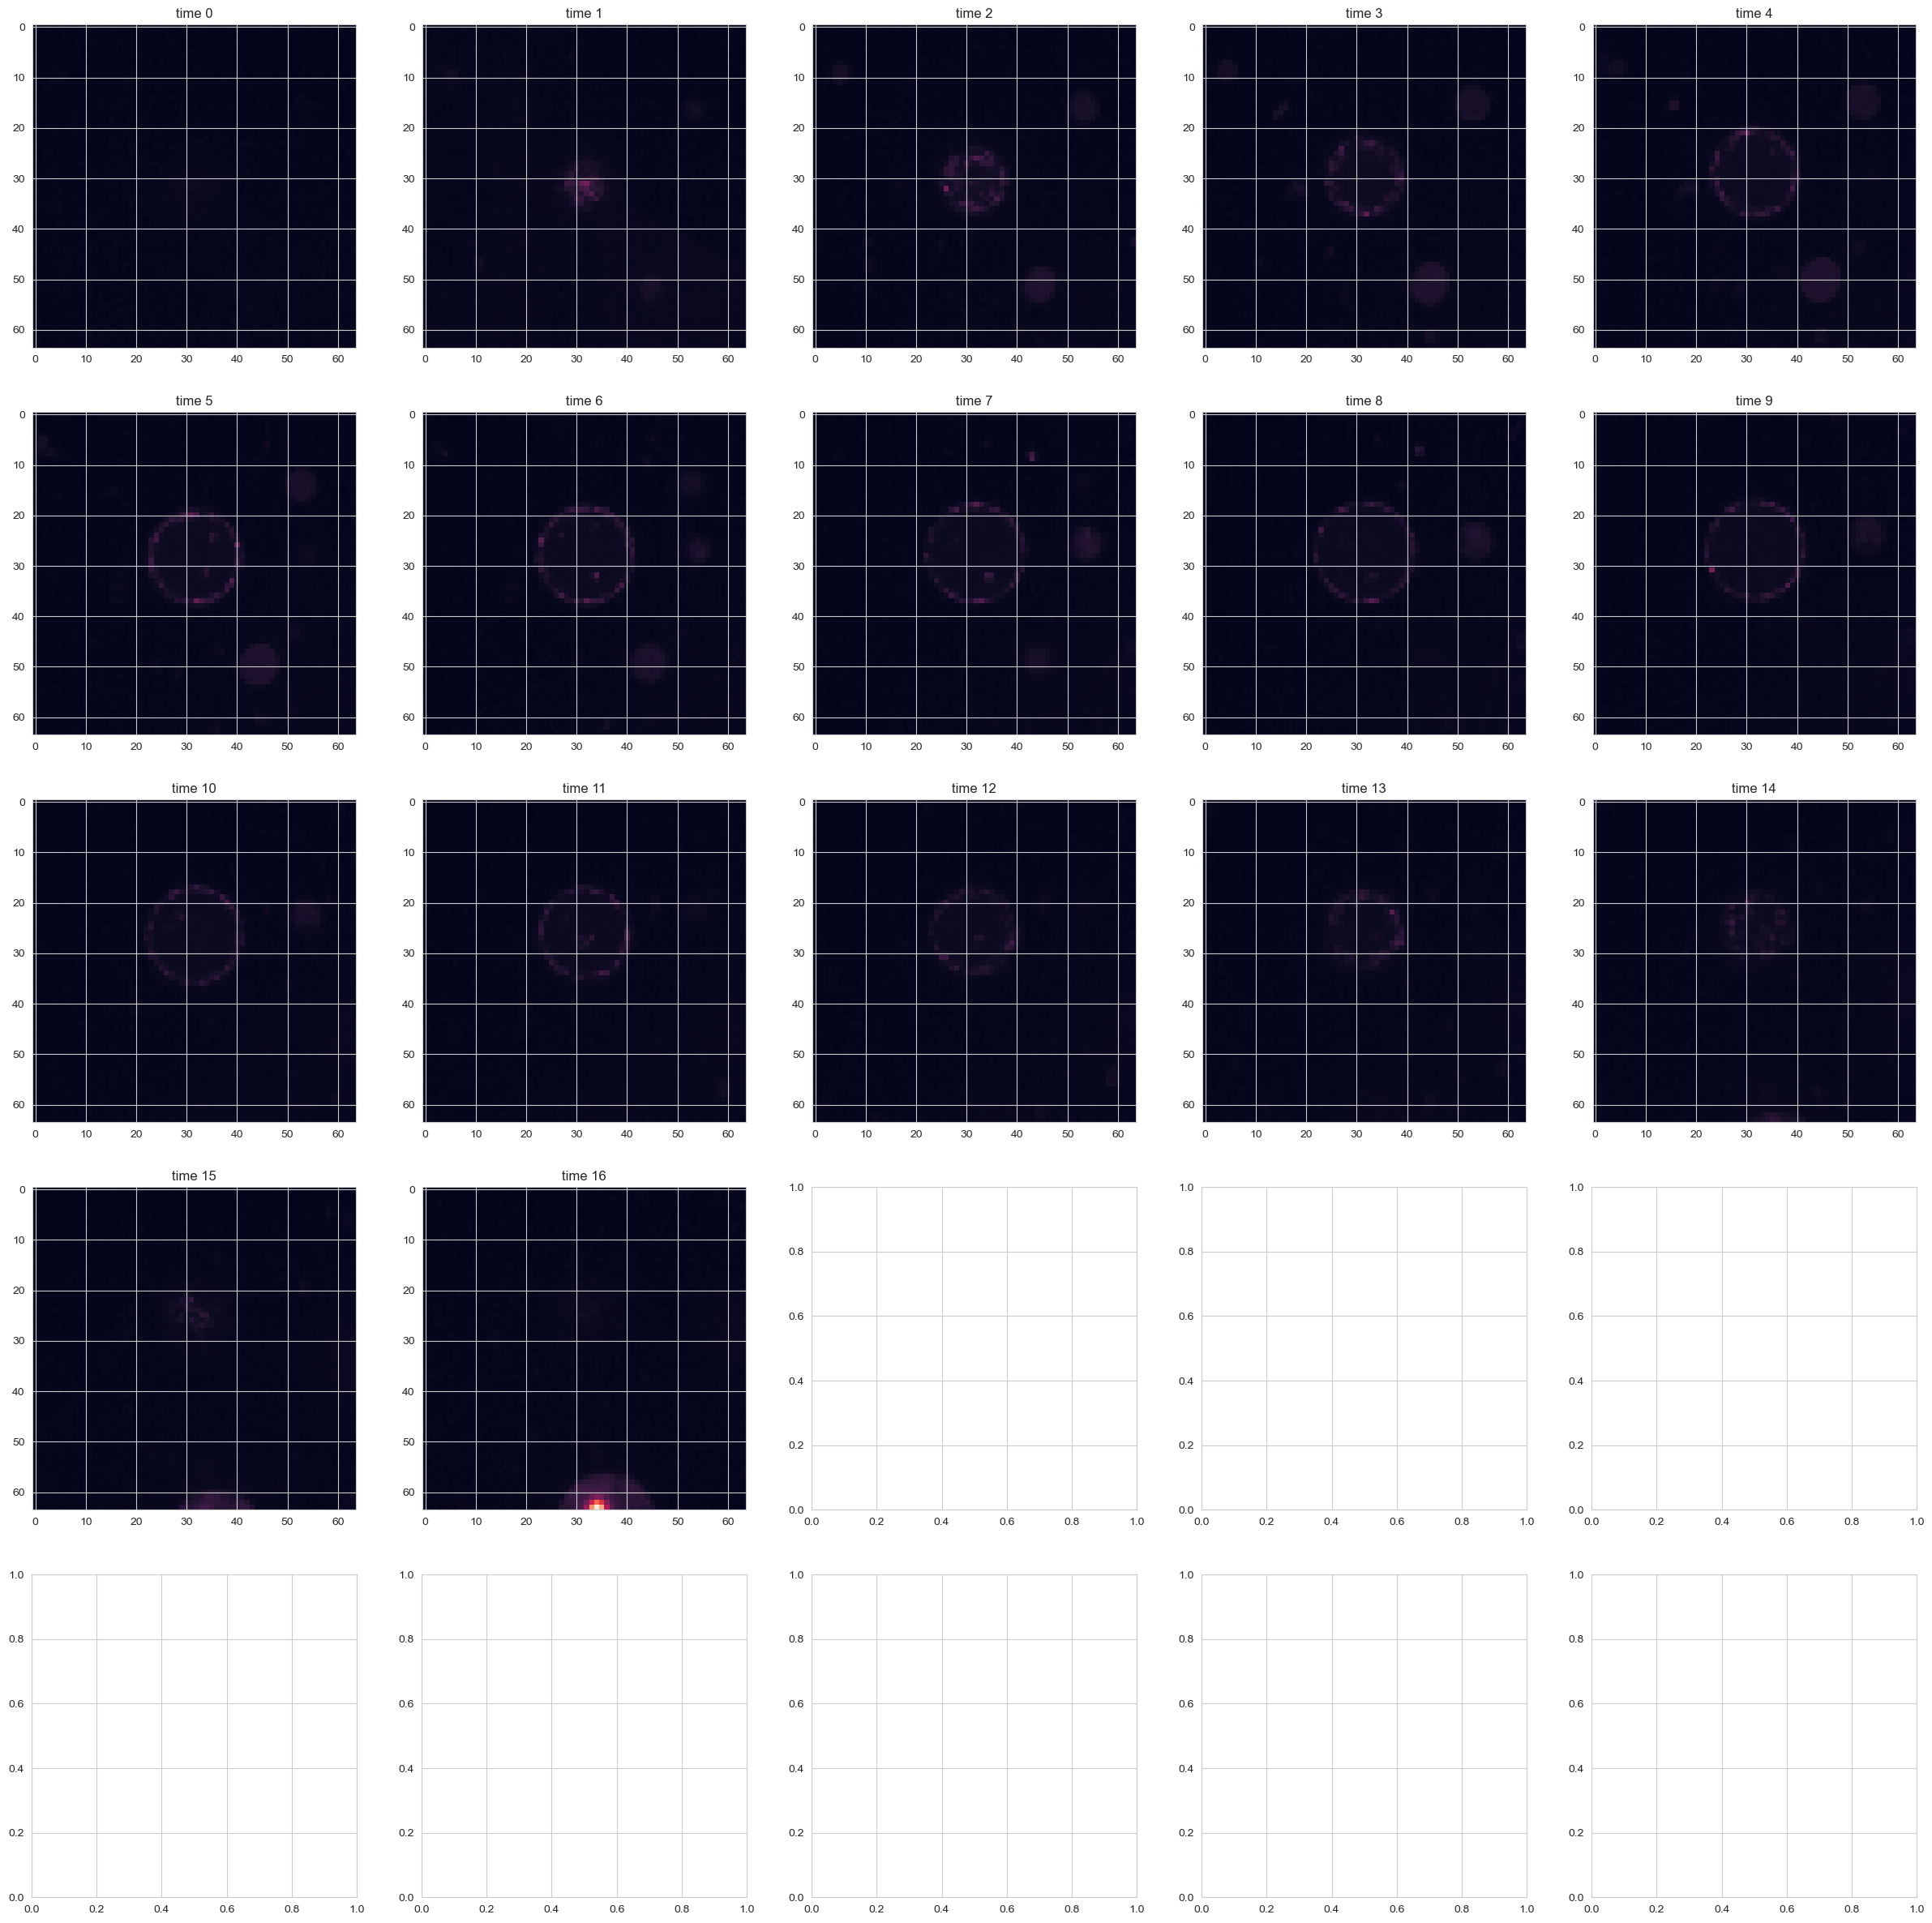

In [49]:
gu.show_imshow_sequence_with_colorbar(ds_img2, list(range(20)))